# Assignemnt 1 (Optimization method)

# Question 4

In [35]:
from gurobipy import *#--------------importing required libraries
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from string import*
from pandas import *
from random import randrange

In [36]:
X= int(input("Enter Number of Vetex:"))#------------------inputing the total number of vertices as X
print("you hhave entered vertex: " ,+ X)


Enter Number of Vetex:6
you hhave entered vertex:  6


# The question states that, each vertex should have less then or equal X/2 edges connected to it. 

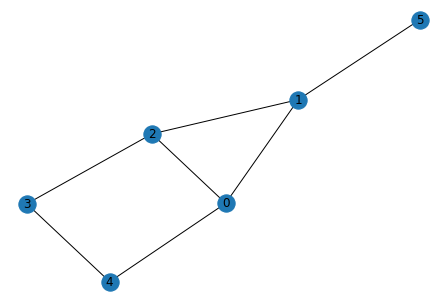

In [57]:

#----------------------creating 
a =[]
graph_C = []#----------------this list will contain all the edges

b= []
for i in range(X):




    rand_num_edge = randrange(int(X/2))+1#--------------using this values can range from 0 to x/2,considered + 1 because it starts from 0

    for j in range(rand_num_edge):

        c = 0
        count = 0
        a.clear()
        b.clear()

        k = randrange(X-1)

        a.append(i)
        b.append(k)
        c = a+b





        for el in range(len(graph_C)):#------------------------loop to check to avoid repeated edges more than x/2
            if(graph_C[el] == [i,k] or graph_C[el] == [k,i]):

                count = count +1
                #print("counted")





        if (count >=1):#---------------repeating loop repeated edges moore than x/2
            j = j-1

            #print("repeated")
            continue

        graph_C.append(c)





graph_C  
graph = nx.Graph()
graph.add_edges_from(graph_C)
nx.draw(graph, with_labels=True)
plt.show()


In [49]:
graph_C

[[0, 4], [1, 1], [1, 2], [1, 0], [3, 2], [4, 3], [5, 4]]

# gurobi starts here (optimization starts from here)

In [50]:


vertices  = range(X)
edges     = graph_C


m = Model()
vertexVariable = {}

for v in vertices:
    vertexVariable[v] = m.addVar(vtype=GRB.BINARY,obj=1)

m.update()

for edge in edges:
    u = edge[0]
    v = edge[1]
    xu = vertexVariable[u]
    xv = vertexVariable[v]
    m.addConstr(xu + xv >= 1, name="e%d-%d" % (u, v))

m.update()

m.optimize()

cover = []

for v in vertices:
    if vertexVariable[v].X > 0.5:
        print ('Vertex--------------------------SEE HERE----------------------', + v)
        cover.append(v)

for edge in edges:
    u = edge[0]
    v = edge[1]



Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 7 rows, 6 columns and 13 nonzeros
Model fingerprint: 0x7b7917a5
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 7 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Vertex--------------------------SEE HERE---------------------- 1
Vertex--------------------------SEE HERE---------------------- 3
Vertex--------------------------SEE HERE---------------------- 4
